<a href="https://colab.research.google.com/github/guilhermeterenciani/IA/blob/main/Lista_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
import torch.nn as nn

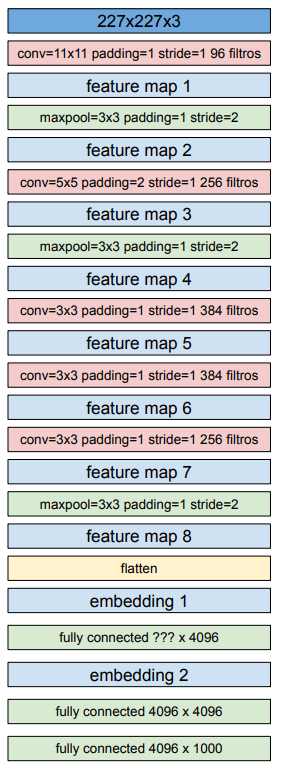

In [82]:
x = torch.randn((1,3,227,227))
x.shape

torch.Size([1, 3, 227, 227])

In [83]:
from torch.nn.modules.activation import ReLU
conv1 = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=1,padding=1)
)

In [84]:
conv1[0].weight.shape

torch.Size([96, 3, 11, 11])

In [85]:
s1 = conv1(x)

In [86]:
s1.shape

torch.Size([1, 96, 219, 219])

In [57]:
import torchsummary
import numpy as np
torchsummary.summary(conv1,(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 219, 219]          34,944
Total params: 34,944
Trainable params: 34,944
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.59
Forward/backward pass size (MB): 35.13
Params size (MB): 0.13
Estimated Total Size (MB): 35.85
----------------------------------------------------------------


In [58]:
(11*11*3 +1) * 96

34944

In [87]:
relu = nn.ReLU()

In [92]:
s2 = relu(s1)

In [93]:
pool1 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)

In [94]:
s3 = pool1(s2)

In [96]:
s3.shape

torch.Size([1, 96, 110, 110])

In [97]:
conv2 = nn.Sequential(nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2))

In [98]:
s4 = conv2(s3)

In [99]:
s4.shape

torch.Size([1, 256, 110, 110])

In [101]:
torchsummary.summary(conv2,(96,110,110))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 256, 110, 110]         614,656
Total params: 614,656
Trainable params: 614,656
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 4.43
Forward/backward pass size (MB): 23.63
Params size (MB): 2.34
Estimated Total Size (MB): 30.41
----------------------------------------------------------------


In [60]:
(5*5*96+1)*256

614656

In [102]:
s5 = relu(s4)

In [103]:
s6 = pool1(s5)

In [105]:
s6.shape

torch.Size([1, 256, 55, 55])

In [107]:
conv3 = nn.Sequential(nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1))

In [108]:
s7 = conv3(s6)

In [109]:
torchsummary.summary(conv3,(256,55,55))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 384, 55, 55]         885,120
Total params: 885,120
Trainable params: 885,120
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 2.95
Forward/backward pass size (MB): 8.86
Params size (MB): 3.38
Estimated Total Size (MB): 15.19
----------------------------------------------------------------


In [110]:
s8 = relu(s7)

In [111]:
s8.shape

torch.Size([1, 384, 55, 55])

In [106]:
#parâmetros conv3x3
(3*3*256+1)*384

885120

In [114]:
conv4 = nn.Sequential(nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1))

In [115]:
s9 = conv4(s8)

In [116]:
torchsummary.summary(conv4,(384, 55, 55))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 384, 55, 55]       1,327,488
Total params: 1,327,488
Trainable params: 1,327,488
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 4.43
Forward/backward pass size (MB): 8.86
Params size (MB): 5.06
Estimated Total Size (MB): 18.36
----------------------------------------------------------------


In [121]:
s9.shape

torch.Size([1, 384, 55, 55])

In [117]:
s10 = relu(s9)

In [112]:
(3*3*384+1)*384

1327488

In [119]:
conv5 = nn.Sequential(nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1))

In [120]:
s11 = conv5(s10)

In [122]:
torchsummary.summary(conv5,(384, 55, 55))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 256, 55, 55]         884,992
Total params: 884,992
Trainable params: 884,992
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 4.43
Forward/backward pass size (MB): 5.91
Params size (MB): 3.38
Estimated Total Size (MB): 13.72
----------------------------------------------------------------


In [124]:
s12 = relu(s11)
s12.shape

torch.Size([1, 256, 55, 55])

In [118]:
(3*3*384+1)*256

884992

In [125]:
s13 = pool1(s12)

In [126]:
s13.shape

torch.Size([1, 256, 28, 28])

In [136]:
28*28*256*4096 +1

822083585

In [127]:
flatten =nn.Flatten()

In [129]:
s14 = flatten(s13)
s14.shape

torch.Size([1, 200704])

In [132]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
    nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
    nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
    nn.Flatten(),
    nn.Linear(28*28*256,4096),
    nn.ReLU(),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Linear(4096,1000)
)

In [135]:
torchsummary.summary(model,(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 219, 219]          34,944
              ReLU-2         [-1, 96, 219, 219]               0
         MaxPool2d-3         [-1, 96, 110, 110]               0
            Conv2d-4        [-1, 256, 110, 110]         614,656
              ReLU-5        [-1, 256, 110, 110]               0
         MaxPool2d-6          [-1, 256, 55, 55]               0
            Conv2d-7          [-1, 384, 55, 55]         885,120
              ReLU-8          [-1, 384, 55, 55]               0
            Conv2d-9          [-1, 384, 55, 55]       1,327,488
             ReLU-10          [-1, 384, 55, 55]               0
           Conv2d-11          [-1, 256, 55, 55]         884,992
             ReLU-12          [-1, 256, 55, 55]               0
        MaxPool2d-13          [-1, 256, 28, 28]               0
          Flatten-14               [-1,

In [148]:
(28*28*256 +1)*4096

822087680

In [150]:
(4096 +1)*4096

16781312

In [151]:
(4096+1)*1000

4097000

In [149]:
#Quantidade de parâmetros
34944+614656+885120+1327488+884992+(28*28*256 +1)*4096 +(4096*(4096 +1))+ (4096+1)*1000

846713192

In [154]:
class ModelLista1(nn.Module):
    def __init__(self):
        super(ModelLista1,self).__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
            nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
            nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
            nn.Flatten(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(28*28*256,4096),
            nn.ReLU(),
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Linear(4096,1000)
        )
    def forward(self,x):
        x = self.backbone(x)
        return self.classifier(x)

In [155]:
torchsummary.summary(ModelLista1(),(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 219, 219]          34,944
              ReLU-2         [-1, 96, 219, 219]               0
         MaxPool2d-3         [-1, 96, 110, 110]               0
            Conv2d-4        [-1, 256, 110, 110]         614,656
              ReLU-5        [-1, 256, 110, 110]               0
         MaxPool2d-6          [-1, 256, 55, 55]               0
            Conv2d-7          [-1, 384, 55, 55]         885,120
              ReLU-8          [-1, 384, 55, 55]               0
            Conv2d-9          [-1, 384, 55, 55]       1,327,488
             ReLU-10          [-1, 384, 55, 55]               0
           Conv2d-11          [-1, 256, 55, 55]         884,992
             ReLU-12          [-1, 256, 55, 55]               0
        MaxPool2d-13          [-1, 256, 28, 28]               0
          Flatten-14               [-1,